<a href="https://colab.research.google.com/github/alks444/A3-ESILV/blob/main/TD_Final_DVF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration de données : liste de commande

## 1- Import des modules pandas as pd et numpy as np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2- Importation des données de l'[adresse suivante](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/#/resources/78348f03-a11c-4a6b-b8db-2acf4fee81b1)
On charge le fichier à l'aide de la méthode  [pd.read_csv(....)](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)

On modifie le séparateur de défaut par "|".
On ajoute l'option 'low_memory = False' car le fichier est volumineux. Sans ce paramètre le fichier ne peut être chargé dans une varibale.


In [ ]:
df = pd.read_csv("https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-093059/valeursfoncieres-2022.txt",delimiter = "|", low_memory = False)

## 3- Observer le type de df et le Head de **df**
[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head/)

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.head(0))

Empty DataFrame
Columns: [Identifiant de document, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, B/T/Q, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Prefixe de section, Section, No plan, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Nombre de lots, Code type local, Type local, Identifiant local, Surface reelle bati, Nombre pieces principales, Nature culture, Nature culture speciale, Surface terrain]
Index: []

[0 rows x 43 columns]


## 4- Le nombre de lignes des données

In [ ]:
df.shape[0]

4617590

## 5- Le nombre de colonnes des données

In [ ]:
df.shape[1]

43

## 6- Pour plus d'infos on utilise df.info()

En connaissant le nombre de lignes grace à la fonction 'df.shape[0]', on pourra éliminer les colonnes avec un Non-Null Count = 0. Cela signifie que les colonnes sont vides.

On pourra aussi remarqué le Dtype des colonnes, en regardant le nom de celles-ci on peut en déduire s'il y a une conversion à faire ou non sur le Dtype des colonnes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617590 entries, 0 to 4617589
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

## 7- Afficher les nom des colonnes (df.columns)

In [ ]:
df.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

## 8- Comment les données sont indéxées? (df.index)

In [ ]:
df.index

RangeIndex(start=0, stop=4617590, step=1)

# Nettoyage des données

## DataFrame avant nettoyage :

In [ ]:
print(df.sample(10))

         Identifiant de document  Reference document  1 Articles CGI  \
2725782                      NaN                 NaN             NaN   
4590757                      NaN                 NaN             NaN   
1871062                      NaN                 NaN             NaN   
3649887                      NaN                 NaN             NaN   
180952                       NaN                 NaN             NaN   
2332169                      NaN                 NaN             NaN   
3079660                      NaN                 NaN             NaN   
2881753                      NaN                 NaN             NaN   
3947676                      NaN                 NaN             NaN   
1002778                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
2725782             NaN             NaN             NaN             NaN   
4590757             NaN             NaN             NaN  

## Supprimer les colonnes entièrement vides

On effectue un premier nettoyage en supprimant les colonnes vides. En regardant df.info on remarque qu'il y en a 8. On les supprime à l'aide de la fonction df.drop()

In [ ]:
df_clean = df

df_clean = df_clean.drop('Identifiant de document', axis=1)
df_clean = df_clean.drop('Reference document', axis=1)
df_clean = df_clean.drop('1 Articles CGI', axis=1)
df_clean = df_clean.drop('2 Articles CGI', axis=1)
df_clean = df_clean.drop('3 Articles CGI', axis=1)
df_clean = df_clean.drop('4 Articles CGI', axis=1)
df_clean = df_clean.drop('5 Articles CGI', axis=1)
df_clean = df_clean.drop('Identifiant local', axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617590 entries, 0 to 4617589
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 float64
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot             

In [ ]:
pd.set_option('display.max_columns', None)
df_clean.sample(30)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
1198943,1,29/04/2022,Vente,"600000,00",NaN,NaN,NaN,B041,KREAC'H AN AVEL,29880.0,PLOUGUERNEAU,29,195,NaN,CO,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,182.0
2431681,1,20/12/2022,Vente,"33000,00",NaN,NaN,NaN,B031,LE PAQUIS DES FEES,51290.0,HAUTEVILLE,51,286,NaN,AB,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,BP,NaN,1056.0
2732189,1,22/02/2022,Vente en l'état futur d'achèvement,"255500,00",13.0,NaN,RTE,0040,DU CHAPEAU ROUGE,59229.0,TETEGHEM-COUDEKERQUE-VILLAGE,59,588,NaN,AD,35,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3248735,2,14/03/2022,Vente,"360,00",NaN,NaN,NaN,B024,CHAMP DE L ETANG GUINOT,71370.0,ABERGEMENT STE COLOMBE L,71,2,NaN,D,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,260.0
1063218,1,15/09/2022,Vente,"85000,00",31.0,NaN,RUE,0123,PIERRE SEMARD,26240.0,SAINT UZE,26,332,NaN,E,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,78.0
1324255,1,31/03/2022,Vente,"521800,00",3.0,NaN,IMP,0134,DES MOULINS,31700.0,CORNEBARRIEU,31,150,NaN,AM,634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,169.0,6.0,S,NaN,834.0
1775959,1,12/09/2022,Vente,"2800,00",NaN,NaN,NaN,B134,LES GOUTIERRERIES,37140.0,CHOUZE SUR LOIRE,37,74,NaN,AS,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,691.0
3145860,1,29/04/2022,Vente en l'état futur d'achèvement,"401960,00",NaN,NaN,NaN,B058,LA MAGNANERIE,69780.0,MIONS,69,283,NaN,AY,270,NaN,6,"87,26",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,87.0,4.0,NaN,NaN,NaN
2101871,1,30/08/2022,Vente,"282500,00",86.0,NaN,RUE,2760,DU PLANTY,44340.0,BOUGUENAIS,44,20,NaN,CZ,635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,64.0
3559850,1,24/05/2022,Vente,"112000,00",27.0,NaN,RUE,0160,DE NOGENT,77560.0,VILLIERS-SAINT-GEORGES,77,519,NaN,D,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,866.0


    Maintenant on se penche sur le dtype de certaines colonnes. Par exemple :
        - Date mutation en DateTime
        - Nature mutation en string(?)
        - valeur foncière peut etre en float64
        - numero de voie peut etre un int
        
    etc...

In [ ]:
print(df_clean.head(100))

    No disposition Date mutation Nature mutation Valeur fonciere  No voie  \
0                1    03/01/2022           Vente        55000,00     13.0   
1                1    03/01/2022           Vente       143000,00      NaN   
2                1    03/01/2022           Vente       143000,00      NaN   
3                1    03/01/2022           Vente       143000,00     98.0   
4                1    04/01/2022           Vente          300,00      NaN   
..             ...           ...             ...             ...      ...   
95               1    11/01/2022           Vente       133600,00      6.0   
96               1    11/01/2022           Vente       133600,00      6.0   
97               1    11/01/2022           Vente       133600,00      NaN   
98               1    10/01/2022           Vente       306000,00     37.0   
99               1    10/01/2022           Vente       306000,00     37.0   

   B/T/Q Type de voie Code voie                Voie  Code postal  \
0    Na

## Traiter les valeurs manquantes :

In [ ]:
dfavecDonneeManquante.dropna(how="any")
dfavecDonneeManquante.dropna(how="all")
dfavecDonneeManquante.fillna(value=100)
dfavecDonneeManquante.isna()


NameError: name 'dfavecDonneeManquante' is not defined

## Convertir Valeur foncière en float :

In [ ]:
conversion_float = lambda x: float(f"{x.replace(',', '.')}") if pd.notna(x) and ',' in x else float('nan')
df_clean['Valeur fonciere'] = df_clean['Valeur fonciere'].apply(conversion_float)
print(df_clean['Valeur fonciere'])

0            55000.0
1           143000.0
2           143000.0
3           143000.0
4              300.0
             ...    
4617585     188100.0
4617586    2145000.0
4617587    2145000.0
4617588     111000.0
4617589     366440.0
Name: Valeur fonciere, Length: 4617590, dtype: float64


## Convertir Code postal au bon format :

In [ ]:
conversion_CodePostal = lambda x: int(x) if pd.notna(x) else float('nan')
df_clean['Code postal'] = df_clean['Code postal'].astype('Int64', errors='ignore')
print(df_clean['Code postal'])

0           1000
1           1480
2           1480
3           1480
4           1480
           ...  
4617585    75016
4617586    75016
4617587    75016
4617588    75006
4617589     <NA>
Name: Code postal, Length: 4617590, dtype: Int64


## DataFrame après nettoyage :

In [ ]:
print(df_clean.sample(10))

         No disposition Date mutation Nature mutation  Valeur fonciere  \
54826                 1    04/03/2022           Vente          48000.0   
1357696               1    21/09/2022           Vente         258800.0   
3116050               1    05/10/2022           Vente         513002.0   
2556438               2    18/05/2022           Vente         182000.0   
2227861               1    12/07/2022           Vente         125900.0   
4395186               1    30/06/2022           Vente         170000.0   
885349                1    01/08/2022           Vente          14000.0   
1935790               1    29/11/2022           Vente         110000.0   
951864                2    19/04/2022           Vente           2000.0   
45533                 1    08/12/2022           Vente              1.0   

         No voie B/T/Q Type de voie Code voie                      Voie  \
54826       32.0   NaN          RUE      1590             DE LA LINOTTE   
1357696     10.0   NaN          RUE

# Analyse des données

## Compter le nombre de nature de mutation effectuées au premier semestre 2023

In [ ]:
df_type_nombre = df_clean.groupby('Type local')['Nature mutation'].count()
print(df_type_nombre)

Type local
Appartement                                  638879
Dépendance                                  1203439
Local industriel. commercial ou assimilé     142535
Maison                                       756009
Name: Nature mutation, dtype: int64


In [ ]:
pd.set_option('display.max_rows',None)
print(df_clean['Surface terrain'].sort_values()[0:50000])

1102348     0.0
2500168     0.0
2798129     0.0
2798128     0.0
2785870     0.0
2785871     0.0
2785872     0.0
2517492     0.0
2785874     0.0
2517323     0.0
2786275     0.0
2948985     0.0
2797078     0.0
2500614     0.0
2948984     0.0
2796758     0.0
3354968     0.0
409784      0.0
1101285     0.0
1101282     0.0
1288905     0.0
1288908     0.0
2536370     0.0
2290748     0.0
2536369     0.0
1101281     0.0
1101286     0.0
2787466     0.0
4087708     0.0
2798521     0.0
4496278     0.0
4496279     0.0
2305478     0.0
2305480     0.0
270049      0.0
270050      0.0
2631101     0.0
2882247     0.0
1480271     0.0
4179892     0.0
2802931     0.0
270047      0.0
3597930     0.0
3307455     0.0
4013131     0.0
1476407     0.0
295055      0.0
3466698     0.0
2801074     0.0
2800397     0.0
969042      0.0
798767      0.0
798768      0.0
2302107     0.0
2057032     0.0
2784887     0.0
2787607     0.0
2785869     0.0
2787612     0.0
3460587     0.0
2787610     0.0
2534773     0.0
2415463 

In [ ]:
pd.reset_option('display.max_rows',None)

df_clean['Prix du m^2'] = df_clean.apply(lambda row: float(row['Valeur fonciere']) / float(row['Surface terrain']) if pd.notna(row['Valeur fonciere']) and pd.notna(row['Surface terrain']) and float(row['Surface terrain']) != 0 else float('nan'), axis=1)
df_clean['Prix du m^2'] = df_clean['Prix du m^2'].where(df_clean['Prix du m^2'] < 13000, float('nan'))

print(df_clean['Prix du m^2'].sort_values(ascending=False)[0:10])
print(df_clean['Valeur fonciere'].sort_values( ascending = False)[0:10])


391633     12999.954545
1712873    12999.166667
501711     12999.166667
393218     12998.947368
2920847    12998.407407
1121918    12998.119760
4468433    12997.873848
1578430    12997.580645
3337264    12996.389892
1848032    12995.454545
Name: Prix du m^2, dtype: float64
4613735    1.003401e+09
4613741    1.003401e+09
4613746    1.003401e+09
4613745    1.003401e+09
4613744    1.003401e+09
4613743    1.003401e+09
4613742    1.003401e+09
4613747    1.003401e+09
4613740    1.003401e+09
4613738    1.003401e+09
Name: Valeur fonciere, dtype: float64


## Afficher le nombre de mutations par type

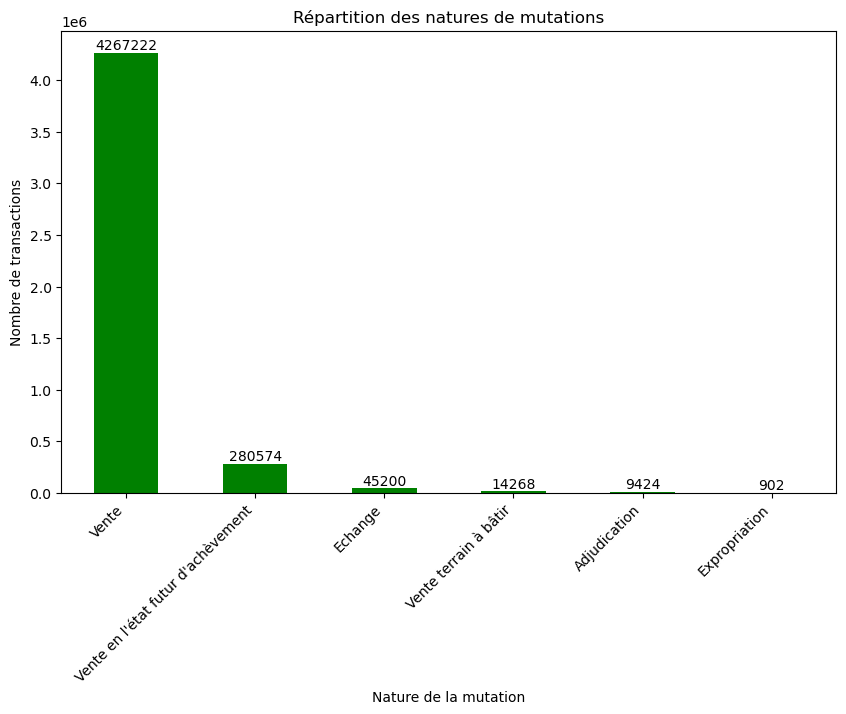

In [ ]:
plt.figure(figsize=(10, 6))
ax = df_clean['Nature mutation'].value_counts().plot(kind='bar', color='green')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Nature de la mutation')
plt.ylabel('Nombre de transactions')
plt.title('Répartition des natures de mutations')
plt.xticks(rotation=45, ha='right')
plt.show()